In [ ]:
!wget --no-cache -O init.py -q https://raw.githubusercontent.com/rramosp/ai4eng.v1/main/content/init.py
import init; init.init(force_download=False); init.get_weblink()

replicating local resources


In [ ]:
!pip install opendatasets
import opendatasets as od

In [ ]:
username = "jhonalexandera"
key = "9bde6e3f5f31a568e1ba313650d39fec"

In [ ]:
dataset_link="https://www.kaggle.com/competitions/udea-ai-4-eng-20251-pruebas-saber-pro-colombia"
od.download(dataset_link)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: jhonalexandera
Your Kaggle Key: ··········


100%|██████████| 29.9M/29.9M [00:00<00:00, 908MB/s]


Extracting archive ./udea-ai-4-eng-20251-pruebas-saber-pro-colombia/udea-ai-4-eng-20251-pruebas-saber-pro-colombia.zip to ./udea-ai-4-eng-20251-pruebas-saber-pro-colombia


In [ ]:
import os
os.chdir("udea-ai-4-eng-20251-pruebas-saber-pro-colombia")
os.listdir()

['submission_example.csv', 'train.csv', 'test.csv']

In [ ]:
!wc *.csv

   296787    296787   4716673 submission_example.csv
   296787   4565553  59185250 test.csv
   692501  10666231 143732449 train.csv
  1286075  15528571 207634372 total


In [ ]:
import pandas as pd
import numpy as np

z = pd.read_csv("train.csv")
print ("shape of loaded dataframe", z.shape)


shape of loaded dataframe (692500, 21)


In [ ]:
z.head(3)

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,...,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL,coef_1,coef_2,coef_3,coef_4
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,...,N,No,Si,Si,Postgrado,medio-alto,0.322,0.208,0.310,0.267
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,...,N,No,Si,No,Técnica o tecnológica incompleta,bajo,0.311,0.215,0.292,0.264
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,...,N,No,No,Si,Secundaria (Bachillerato) completa,bajo,0.297,0.214,0.305,0.264


In [ ]:
z.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 21 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   ID                              692500 non-null  int64  
 1   PERIODO                         692500 non-null  int64  
 2   ESTU_PRGM_ACADEMICO             692500 non-null  object 
 3   ESTU_PRGM_DEPARTAMENTO          692500 non-null  object 
 4   ESTU_VALORMATRICULAUNIVERSIDAD  686213 non-null  object 
 5   ESTU_HORASSEMANATRABAJA         661643 non-null  object 
 6   FAMI_ESTRATOVIVIENDA            660363 non-null  object 
 7   FAMI_TIENEINTERNET              665871 non-null  object 
 8   FAMI_EDUCACIONPADRE             669322 non-null  object 
 9   FAMI_TIENELAVADORA              652727 non-null  object 
 10  FAMI_TIENEAUTOMOVIL             648877 non-null  object 
 11  ESTU_PRIVADO_LIBERTAD           692500 non-null  object 
 12  ESTU_PAGOMATRICU

# Preprocesado y limpieza

In [ ]:
# Copia del dataframe original
df2 = z.copy()

In [ ]:
# 0. Lista completa de columnas a eliminar (exceptuando 'RENDIMIENTO_GLOBAL')
cols_to_drop = [
    'PERIODO',
    'ESTU_PAGOMATRICULAPROPIO'
]

# Aplicamos el cambio
df2 = df2.drop(columns=cols_to_drop)

In [ ]:
# 1. Eliminar duplicada 'FAMI_TIENEINTERNET.1' si es igual a 'FAMI_TIENEINTERNET'

if df2['FAMI_TIENEINTERNET'].equals(df2['FAMI_TIENEINTERNET.1']):
    df2.drop(columns=['FAMI_TIENEINTERNET.1'], inplace=True)

In [ ]:
# 2. Llenar valores nulos

for col in df2.select_dtypes(include='number').columns:
    df2[col] = df2[col].fillna(df2[col].median())

for col in df2.select_dtypes(include='object').columns:
    df2[col] = df2[col].fillna(df2[col].mode()[0])

In [ ]:
# 3. Mapeo informativo basado en el contexto colombiano

valores_matricula_map = {
    'No pagó matrícula': 0.1,
    'Más de 7 millones': 3,
    'Entre 5.5 millones y menos de 7 millones': 2.5,
    'Entre 4 millones y menos de 5.5 millones': 2,
    'Entre 2.5 millones y menos de 4 millones': 1.5,
    'Entre 1 millón y menos de 2.5 millones': 1,
    'Entre 500 mil y menos de 1 millón': 0.5,
    'Menos de 500 mil': 0.3,
    np.nan: 0  # Imputación neutral
}

df2['ESTU_VALORMATRICULAUNIVERSIDAD'] = df2['ESTU_VALORMATRICULAUNIVERSIDAD'].map(valores_matricula_map)


In [ ]:
# 4. Mapeo informativo basado en el contexto colombiano

departamento_map = {
    'BOGOTÁ': 3, 'ANTIOQUIA': 3, 'VALLE': 3,
    'SANTANDER': 2.5, 'ATLANTICO': 2.5, 'CUNDINAMARCA': 2.5, 'BOLIVAR': 2.5, 'CALDAS': 2.5,
    'TOLIMA': 2, 'HUILA': 2, 'RISARALDA': 2, 'QUINDIO': 2, 'BOYACA': 2, 'META': 2, 'NARIÑO': 2, 'CAUCA': 2,
    'CORDOBA': 1.5, 'NORTE SANTANDER': 1.5, 'SUCRE': 1.5, 'MAGDALENA': 1.5, 'CESAR': 1.5,
    'CHOCO': 1, 'PUTUMAYO': 1, 'GUAVIARE': 1, 'VAUPES': 1, 'AMAZONAS': 1, 'SAN ANDRES': 1,
    'ARAUCA': 1, 'CAQUETA': 1, 'CASANARE': 1, 'LA GUAJIRA': 1,
}

df2['ESTU_PRGM_DEPARTAMENTO'] = df2['ESTU_PRGM_DEPARTAMENTO'].map(departamento_map)



In [ ]:
# 5. Mapeo informativo basado en el contexto colombiano

horas_trabajo_map = {
    '0': 0.8,
    'Menos de 10 horas': 0.6,
    'Entre 11 y 20 horas': 0.4,
    'Entre 21 y 30 horas': 0.2,
    'Más de 30 horas': 0
}
df2['ESTU_HORASSEMANATRABAJA'] = df2['ESTU_HORASSEMANATRABAJA'].map(horas_trabajo_map)


In [ ]:
# 6. Cambiamos el tipo de estrato a un entero

df2['FAMI_ESTRATOVIVIENDA'] = df2['FAMI_ESTRATOVIVIENDA'].replace('Sin Estrato', 'Estrato 0')
df2['FAMI_ESTRATOVIVIENDA'] = df2['FAMI_ESTRATOVIVIENDA'].str.extract('Estrato (\d)').astype(int)


In [ ]:
# 7.  Crear codificación one-hot para ambas columnas

df2 = df2.copy()
df2['FAMI_EDUCACIONMADRE'] = df2['FAMI_EDUCACIONMADRE'].replace(['No sabe', 'No Aplica'], 'no info')
df2['FAMI_EDUCACIONPADRE'] = df2['FAMI_EDUCACIONPADRE'].replace(['No sabe', 'No Aplica'], 'no info')


In [ ]:
import numpy as np
import pandas as pd

# One-hot para madre
madre_vals = sorted(df2['FAMI_EDUCACIONMADRE'].dropna().unique())
madre_onehot_map = {val: np.eye(len(madre_vals))[i] for i, val in enumerate(madre_vals)}
madre_onehot_array = np.vstack([madre_onehot_map.get(v, np.zeros(len(madre_vals))) for v in df2['FAMI_EDUCACIONMADRE']])
madre_df = pd.DataFrame(madre_onehot_array, columns=[f"FAMI_EDUCACIONMADRE__{v}" for v in madre_vals])

# One-hot para padre
padre_vals = sorted(df2['FAMI_EDUCACIONPADRE'].dropna().unique())
padre_onehot_map = {val: np.eye(len(padre_vals))[i] for i, val in enumerate(padre_vals)}
padre_onehot_array = np.vstack([padre_onehot_map.get(v, np.zeros(len(padre_vals))) for v in df2['FAMI_EDUCACIONPADRE']])
padre_df = pd.DataFrame(padre_onehot_array, columns=[f"FAMI_EDUCACIONPADRE__{v}" for v in padre_vals])

# Concatenar y eliminar columnas originales
df2 = pd.concat([df2.reset_index(drop=True), madre_df, padre_df], axis=1)
df2 = df2.drop(columns=['FAMI_EDUCACIONMADRE', 'FAMI_EDUCACIONPADRE'])


In [ ]:
# 8. Mapeo informativo basado en el contexto colombiano

rendimiento_map = {
    'bajo': 0,
    'medio-bajo': 1,
    'medio-alto': 2,
    'alto': 3
}
df2['RENDIMIENTO_GLOBAL'] = df2['RENDIMIENTO_GLOBAL'].map(rendimiento_map)


In [ ]:
# 9. Ejemplo de mapeo por áreas

def asignar_puntaje(programa):
    if 'INGENIERIA' in programa:
        return 4.5  # Puntaje alto para ingenierías
    elif 'MEDICINA' in programa or 'ODONTOLOGIA' in programa:
        return 4.7  # Puntaje muy alto para medicina
    elif 'ADMINISTRACION' in programa:
        return 4.0  # Puntaje medio para administración
    elif 'LICENCIATURA' in programa:
        return 3.8  # Puntaje para licenciaturas
    else:
        return 3.5  # Puntaje por defecto

df2['ESTU_PRGM_ACADEMICO'] = df2['ESTU_PRGM_ACADEMICO'].apply(asignar_puntaje)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# 10. Seleccionar columnas tipo object (categóricas)
label_cols = df2.select_dtypes(include='object').columns
if 'RENDIMIENTO_GLOBAL' in label_cols:
    label_cols = label_cols.drop('RENDIMIENTO_GLOBAL')

# 11. Codificar columnas categóricas
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df2[col] = le.fit_transform(df2[col].astype(str))
    label_encoders[col] = le

# Revertir codificación: que 1 sea "no fue privado de la libertad"
# Primero asegúrate de que la columna sea numérica
df2['ESTU_PRIVADO_LIBERTAD'] = df2['ESTU_PRIVADO_LIBERTAD'].astype(int)

# Luego invertimos: 1 → 0 y 0 → 1
df2['ESTU_PRIVADO_LIBERTAD'] = 1 - df2['ESTU_PRIVADO_LIBERTAD']


# 12. (Solo si no se ha hecho antes) Codificar la variable objetivo
if df2['RENDIMIENTO_GLOBAL'].dtype == 'object':
    target_encoder = LabelEncoder()
    df2['RENDIMIENTO_GLOBAL'] = target_encoder.fit_transform(df2['RENDIMIENTO_GLOBAL'])

# 13. Separar X e y
X = df2.drop(['ID', 'RENDIMIENTO_GLOBAL'], axis=1)
y = df2['RENDIMIENTO_GLOBAL']

print("Preprocesamiento completo. Shape X:", X.shape)


Preprocesamiento completo. Shape X: (692500, 36)


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 692500 entries, 0 to 692499
Data columns (total 38 columns):
 #   Column                                                     Non-Null Count   Dtype  
---  ------                                                     --------------   -----  
 0   ID                                                         692500 non-null  int64  
 1   ESTU_PRGM_ACADEMICO                                        692500 non-null  float64
 2   ESTU_PRGM_DEPARTAMENTO                                     692500 non-null  float64
 3   ESTU_VALORMATRICULAUNIVERSIDAD                             692500 non-null  float64
 4   ESTU_HORASSEMANATRABAJA                                    692500 non-null  float64
 5   FAMI_ESTRATOVIVIENDA                                       692500 non-null  int64  
 6   FAMI_TIENEINTERNET                                         692500 non-null  int64  
 7   FAMI_TIENELAVADORA                                         692500 non-null  int64  

In [ ]:
df2

,ID,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,...,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
0,904256,3.5,3.0,2.5,0.6,3,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,645256,3.5,2.5,1.5,0.8,3,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,308367,3.5,3.0,1.5,0.0,3,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,470353,4.0,2.5,2.0,0.8,4,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,989032,3.5,3.0,1.5,0.2,3,1,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,25096,3.5,1.0,0.5,0.4,2,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692496,754213,3.5,1.5,1.5,0.0,3,1,1,0,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,504185,3.5,3.0,1.0,0.6,3,1,1,0,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,986620,3.5,2.0,1.5,0.6,1,0,0,0,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X

,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,FAMI_TIENECOMPUTADOR,...,FAMI_EDUCACIONPADRE__Educación profesional incompleta,FAMI_EDUCACIONPADRE__Ninguno,FAMI_EDUCACIONPADRE__Postgrado,FAMI_EDUCACIONPADRE__Primaria completa,FAMI_EDUCACIONPADRE__Primaria incompleta,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) completa,FAMI_EDUCACIONPADRE__Secundaria (Bachillerato) incompleta,FAMI_EDUCACIONPADRE__Técnica o tecnológica completa,FAMI_EDUCACIONPADRE__Técnica o tecnológica incompleta,FAMI_EDUCACIONPADRE__no info
0,3.5,3.0,2.5,0.6,3,1,1,1,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.5,2.5,1.5,0.8,3,0,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3.5,3.0,1.5,0.0,3,1,1,0,1,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,4.0,2.5,2.0,0.8,4,1,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,3.5,3.0,1.5,0.2,3,1,1,1,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692495,3.5,1.0,0.5,0.4,2,1,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692496,3.5,1.5,1.5,0.0,3,1,1,0,1,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
692497,3.5,3.0,1.0,0.6,3,1,1,0,1,1,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
692498,3.5,2.0,1.5,0.6,1,0,0,0,1,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y

,RENDIMIENTO_GLOBAL
0,2
1,0
2,0
3,3
4,1
...,...
692495,2
692496,0
692497,1
692498,0


In [ ]:
from sklearn.model_selection import train_test_split

Xtr, Xts, ytr, yts = train_test_split(X, y, train_size=0.8, random_state=42)

print("Train:", Xtr.shape, ytr.shape)
print("Test:", Xts.shape, yts.shape)


Train: (554000, 36) (554000,)
Test: (138500, 36) (138500,)


#Implementacion del modelo con RandomForestClassifier

🔍 Random Forest - Accuracy
Entrenamiento: 0.9999963898916967
Validación:   0.38226714801444045


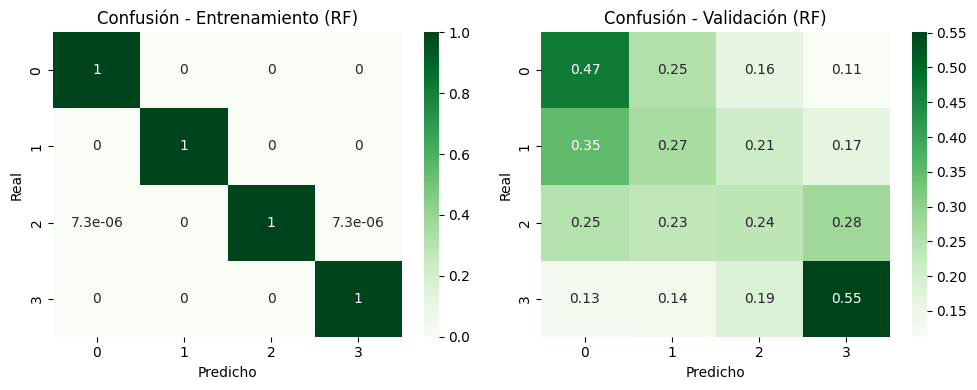

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Entrenar el modelo
rf = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42, n_jobs=-1)
rf.fit(Xtr, ytr)

# 2. Predicciones
preds_rf_tr = rf.predict(Xtr)
preds_rf_ts = rf.predict(Xts)

# 3. Accuracy
acc_rf_tr = accuracy_score(ytr, preds_rf_tr)
acc_rf_ts = accuracy_score(yts, preds_rf_ts)

print("🔍 Random Forest - Accuracy")
print("Entrenamiento:", acc_rf_tr)
print("Validación:  ", acc_rf_ts)

# 4. Matriz de confusión
cm_rf_tr = confusion_matrix(ytr, preds_rf_tr, normalize='true')
cm_rf_ts = confusion_matrix(yts, preds_rf_ts, normalize='true')

# 5. Visualización
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.heatmap(cm_rf_tr, annot=True, cmap="Greens", ax=axs[0])
axs[0].set_title("Confusión - Entrenamiento (RF)")
axs[0].set_ylabel("Real")
axs[0].set_xlabel("Predicho")

sns.heatmap(cm_rf_ts, annot=True, cmap="Greens", ax=axs[1])
axs[1].set_title("Confusión - Validación (RF)")
axs[1].set_ylabel("Real")
axs[1].set_xlabel("Predicho")

plt.tight_layout()
plt.show()
